In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from QuickSort import quick_sort
from HeapSort import heap_sort
from MergeSort import merge_sort
import numpy as np
import gen_data
import time 

### Preparing Dataset

In [26]:
n = 10
p = 1000000
threshold = 1e9
data_set = gen_data.gen(n, p, threshold)

### QuickSort

In [27]:
array_list = data_set

qs_times = []

for array in array_list:
    start = time.perf_counter()
    quick_sort(array, 0, p - 1)
    end = time.perf_counter()
    qs_times.append((end - start) * 1000)

### HeapSort

In [28]:
array_list = data_set

hs_times = []

for array in array_list:
    start = time.perf_counter()
    heap_sort(array, p)
    end = time.perf_counter()
    hs_times.append((end - start) * 1000)

### MergeSort 

In [29]:
array_list = data_set

ms_times = []

for array in array_list:
    start = time.perf_counter()
    merge_sort(array, 0, p - 1)
    end = time.perf_counter()
    ms_times.append((end - start) * 1000)

### Python Sort (NumPy)

In [30]:
array_list = data_set

ns_times = []

for array in array_list:
    start = time.perf_counter()
    array = np.sort(array)
    end = time.perf_counter()
    ns_times.append((end - start) * 1000)

In [31]:
from docx import Document
from docx.shared import Inches

# 1. Khởi tạo dữ liệu giả lập (Bạn thay bằng dữ liệu thật của bạn)
# Ví dụ 10 dãy
data = {
    "QuickSort": qs_times,  # List 10 phần tử thời gian
    "HeapSort": hs_times,
    "MergeSort": ms_times,
    "NumPy Sort": ns_times
}

# 2. Tạo file Word
doc = Document()
doc.add_heading('Báo cáo kết quả thử nghiệm', 0)

# 3. Tạo bảng
# Bảng có 11 hàng (1 header + 10 dữ liệu) và 5 cột (STT + 4 thuật toán)
table = doc.add_table(rows=1, cols=5)
table.style = 'Table Grid' # Kẻ khung cho bảng

# Tạo tiêu đề cột
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Dữ liệu'
hdr_cells[1].text = 'QuickSort (ms)'
hdr_cells[2].text = 'HeapSort (ms)'
hdr_cells[3].text = 'MergeSort (ms)'
hdr_cells[4].text = 'NumPy Sort (ms)'

# Điền dữ liệu
for i in range(10):
    row_cells = table.add_row().cells
    row_cells[0].text = str(i + 1) # Cột STT
    row_cells[1].text = f"{data['QuickSort'][i]:.2f}"
    row_cells[2].text = f"{data['HeapSort'][i]:.2f}"
    row_cells[3].text = f"{data['MergeSort'][i]:.2f}"
    row_cells[4].text = f"{data['NumPy Sort'][i]:.2f}"

# Tính trung bình (Hàng cuối cùng)
avg_row = table.add_row().cells
avg_row[0].text = 'Trung bình'
avg_row[1].text = f"{sum(data['QuickSort'])/10:.2f}"
avg_row[2].text = f"{sum(data['HeapSort'])/10:.2f}"
avg_row[3].text = f"{sum(data['MergeSort'])/10:.2f}"
avg_row[4].text = f"{sum(data['NumPy Sort'])/10:.2f}"

# 4. Lưu file
doc.save('Ket_qua_thu_nghiem.docx')
print("Đã xuất file thành công!")

Đã xuất file thành công!


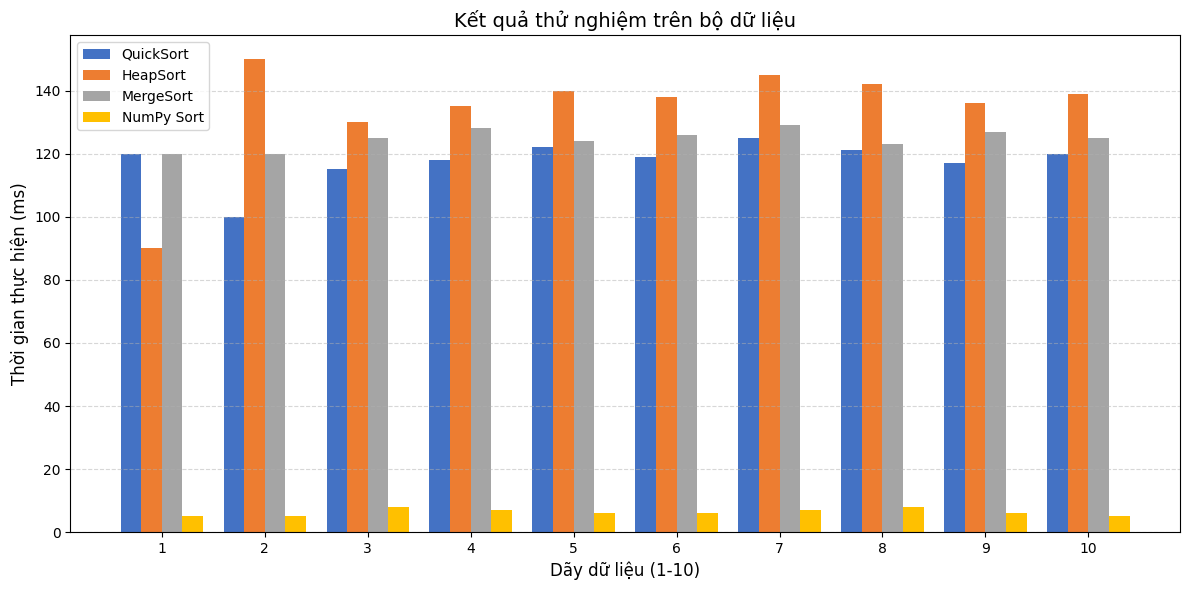

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# --- BƯỚC 1: NHẬP DỮ LIỆU CỦA BẠN VÀO ĐÂY ---
# Thay thế các list này bằng số liệu thực tế bạn đo được (đơn vị ms hoặc giây)
# Ví dụ: qs_times = [120, 100, 150, ...]
qs_times = [120, 100, 115, 118, 122, 119, 125, 121, 117, 120] 
hs_times = [90, 150, 130, 135, 140, 138, 145, 142, 136, 139]
ms_times = [120, 120, 125, 128, 124, 126, 129, 123, 127, 125]
py_times = [5, 5, 8, 7, 6, 6, 7, 8, 6, 5] # NumPy thường cực nhanh

# --- BƯỚC 2: VẼ BIỂU ĐỒ ---
labels = np.arange(1, 11) # Dãy 1 đến 10
width = 0.2 # Độ rộng của cột

fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ từng nhóm cột
rects1 = ax.bar(labels - 1.5*width, qs_times, width, label='QuickSort', color='#4472C4')
rects2 = ax.bar(labels - 0.5*width, hs_times, width, label='HeapSort', color='#ED7D31')
rects3 = ax.bar(labels + 0.5*width, ms_times, width, label='MergeSort', color='#A5A5A5')
rects4 = ax.bar(labels + 1.5*width, py_times, width, label='NumPy Sort', color='#FFC000')

# Trang trí biểu đồ
ax.set_xlabel('Dãy dữ liệu (1-10)', fontsize=12)
ax.set_ylabel('Thời gian thực hiện (ms)', fontsize=12)
ax.set_title('Kết quả thử nghiệm trên bộ dữ liệu', fontsize=14)
ax.set_xticks(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị
plt.tight_layout()
plt.show()